### Harvard GSD  J-Term 2022 
### Introduction to Data Science for Building Simulation and Architectural Design
***
Instructor: Jung Min Han, jhan2@gsd.harvard.edu <br>
Date/Time: Jan 3-7/ 9:30 - 11:00 a.m. <br>
***

Pease copy this colab notebook and rename it before you start! 

---

In [47]:
# import library
import numpy as np
import pandas as pd
from tabulate import tabulate
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import seaborn as sns

import sys, os
from IPython.display import display
import json
import numpy as np
from statsmodels.regression.linear_model import OLS
import pandas as pd
import scipy as sp
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.preprocessing import StandardScaler as Standardize

%matplotlib inline

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Regression

In [49]:
# assign file path
data_path = '/content/drive/My Drive/Colab Notebooks/J_Term/'

## Read your data
df = pd.read_csv(data_path+'target.csv', sep=",", header=0)
refer = pd.read_csv(data_path+'refer.csv', sep=",", header=0)

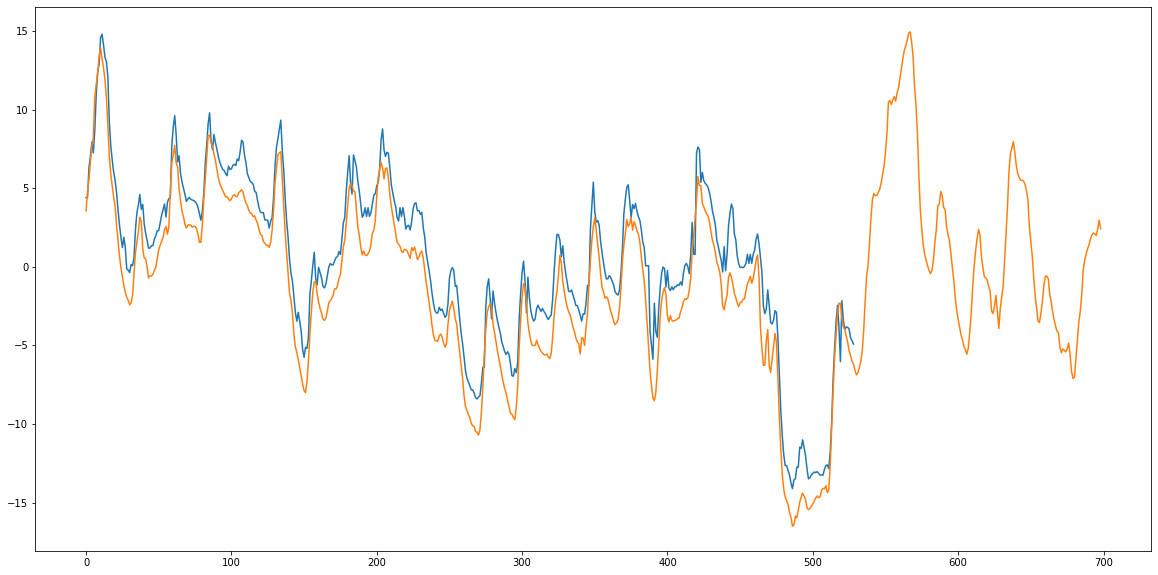

In [50]:
## Visualize your data
plt.figure(figsize=(20,10))
plt.plot(df["Temp"])
plt.plot(refer["Temp"])

In [41]:
## Set training data 
x_train = refer["Temp"][:529].to_numpy()
y_train = df["Temp"].to_numpy()

train_xy = pd.DataFrame({'x': x_train,'y': y_train})

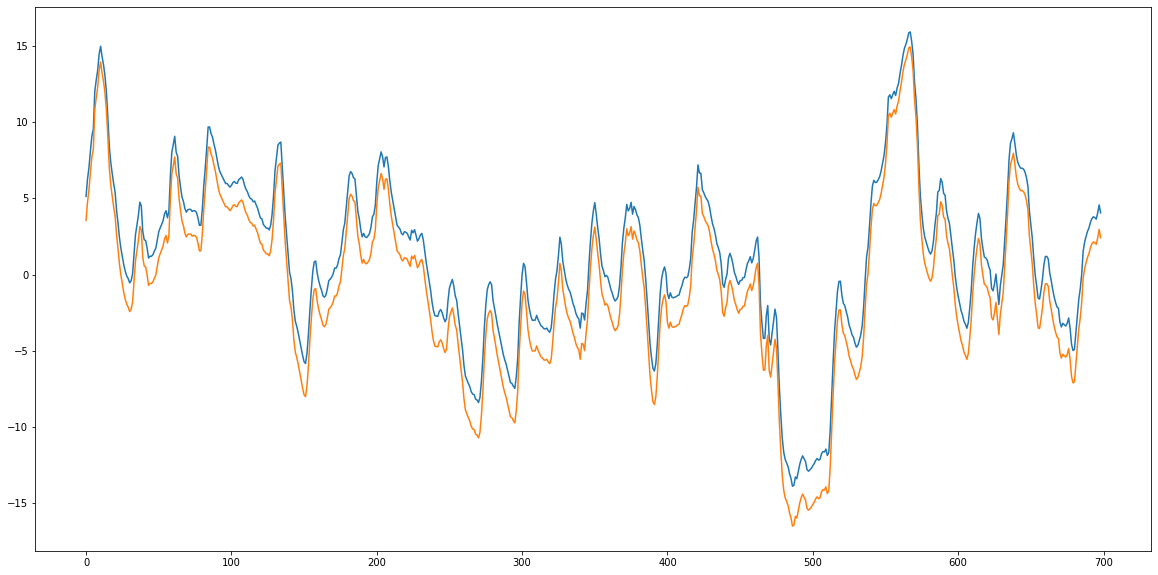

In [43]:
from sklearn.linear_model import LinearRegression as Lin_Reg

x_train = x_train.reshape(-1,1)

# Your code here
Lin_reg


x_pred = refer["Temp"].to_numpy()

# Your code here


pred_xy = pd.DataFrame({'x': x_pred,'y': y_pred})
plt.figure(figsize=(20,10))
plt.plot(pred_xy["y"])
plt.plot(pred_xy["x"])

In [44]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 1 
max_depth = 2

# Your code here




pred_xy = pd.DataFrame({'x': x_pred,'y': y_pred})


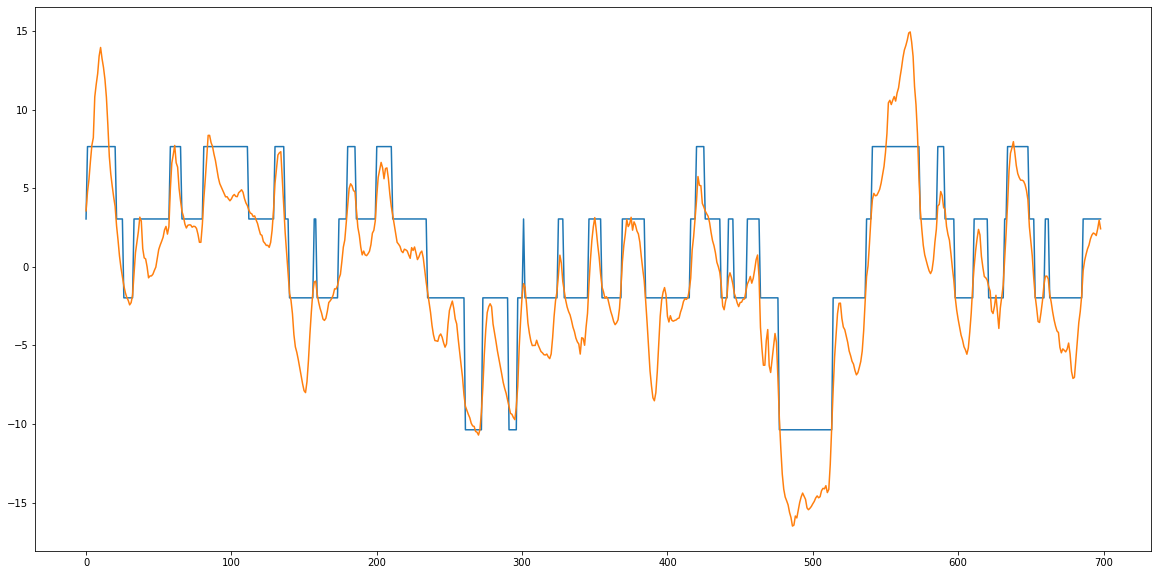

In [45]:
plt.figure(figsize=(20,10))
plt.plot(pred_xy["y"])
plt.plot(pred_xy["x"])


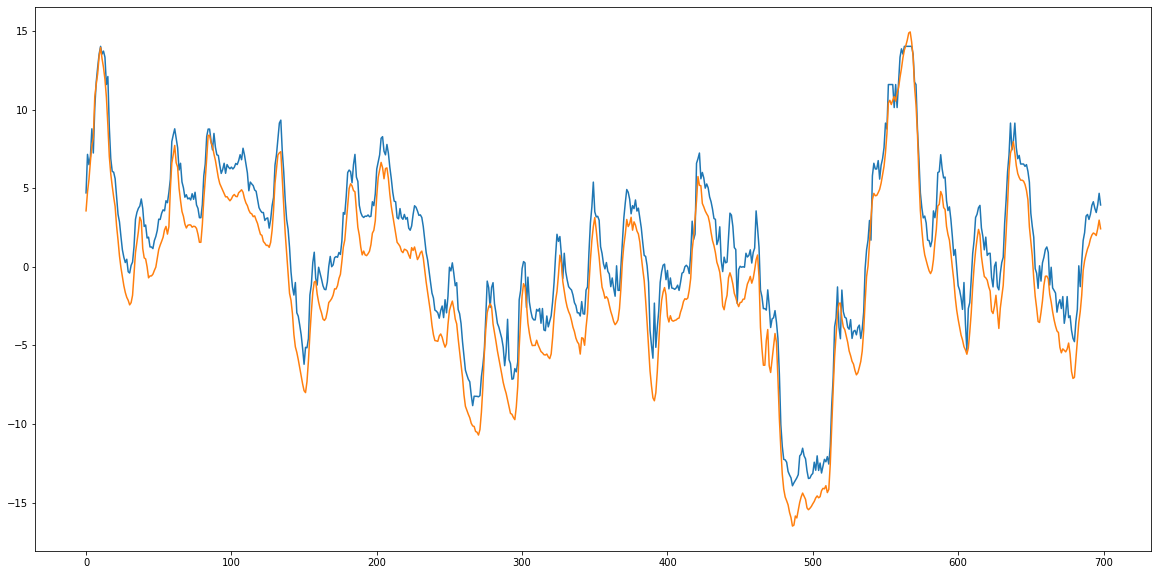

In [46]:
n_estimators = 3
max_depth = 12

reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth) # model (hyper)parameters
reg.fit(x_train,y_train) # fit regressor
y_pred = reg.predict(x_pred.reshape(-1,1))

pred_xy = pd.DataFrame({'x': x_pred,'y': y_pred})

plt.figure(figsize=(20,10))
plt.plot(pred_xy["y"])
plt.plot(pred_xy["x"])

##Rental data regression

In [54]:
# assign file path
rent_data_path = '/content/drive/My Drive/Colab Notebooks/J_Term/Rent.csv'

In [55]:
# load data
rent_df = pd.read_csv(rent_data_path,index_col=0)
rent_df.tail()

,pixelPlant,pixelPole,pixelLake,pixelRoad,pixelGrass,pixelWall,pixelCar,propertiesAsses,pixelSea,numCraigslistHouse,pixelRiver,pixelBus,pixelCeiling,pixelPath,pixelBuilding,crime,walkSchool,walkMbta,energySiteEUI,pixelPerson,pixelTree,pixelVan,walkPark,walkUniversity,pixelSidewalk,pixelGround,pixelMountain,pixelPalmTree,pixelHouse,pixelBridge,pixelSign,pixelRailing,pixelField,pixelWindow,pixelGrandstand,numCraigslistRoom,pixelSky,Latitude,Longitude,Address,Zip,RoomType,Bathrooms,SQM,PricePerSQM
3748,0.0,0.0,0.183,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,42.155000,-70.947600,425,2190.0,2.0,1.0,88.815268,18.014921
3749,0.0,0.0,0.183,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,42.155000,-70.947600,426,2190.0,2.0,1.0,88.815268,19.084556
3750,0.0,0.0,0.183,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,42.166084,-70.954070,2250,2190.0,2.0,1.5,92.903000,17.222264
3751,0.0,0.0,0.183,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,42.184357,-70.942440,358,2190.0,2.0,1.0,96.619120,16.559869
3752,0.0,0.0,0.183,0.0,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,42.186200,-70.956566,194,2190.0,3.0,1.0,111.483600,18.836851


In [57]:
### Step-wise Forward Selection
d = x.shape[1] # total no. of predictors
# Keep track of current set of chosen predictors, and the remaining set of predictors
current_predictors = [] 
remaining_predictors = range(d)

# Set some initial large value for min BIC score for all possible subsets
global_min_bic = 1e10 

# Keep track of the best subset of predictors
best_subset = [] 

# Iterate over all possible subset sizes, 0 predictors to d predictors
for size in range(d):    
    max_r_squared = -1e10 # set some initial small value for max R^2
    best_predictor = -1 # set some throwaway initial number for the best predictor to add
    bic_with_best_predictor = 1e10 # set some initial large value for BIC score   
        
    # Iterate over all remaining predictors to find best predictor to add
    for i in remaining_predictors:
        # Make copy of current set of predictors
        temp = current_predictors[:]
        # Add predictor 'i'
        temp.append(i)
                                    
        # Use only a subset of predictors in the training data
        x_subset = x[:, temp]
        # Add a column of ones
        x_subset = np.hstack((x_subset, np.ones((x_subset.shape[0], 1))))
        
        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if(r_squared > max_r_squared):
            max_r_squared = r_squared
            best_predictor = i
            bic_with_best_predictor = results.bic
    
    # Remove best predictor from remaining list, and add best predictor to current list
    # remaining_predictors.remove(best_predictor)
    current_predictors.append(best_predictor)
    
    # Check if BIC for with the predictor we just added is lower than 
    # the global minimum across all subset of predictors
    if(bic_with_best_predictor < global_min_bic):
        best_subset = current_predictors[:]
        global_min_bic = bic_with_best_predictor
    
print ('Step-wise forward subset selection:')
print (sorted(best_subset)) # add 1 as indices start from 0
forward = data.columns.values[sorted(best_subset)]
print (forward)

Step-wise forward subset selection:
[5, 7, 10, 11, 12, 14, 15, 17, 23, 29, 40, 41, 42, 43]
['pixelWall' 'propertiesAsses' 'pixelRiver' 'pixelBus' 'pixelCeiling'
 'pixelBuilding' 'crime' 'walkMbta' 'walkUniversity' 'pixelBridge' 'Zip'
 'RoomType' 'Bathrooms' 'SQM']


In [131]:
from sklearn.model_selection import train_test_split

Baseline = ['Longitude', 'Latitude','Bathrooms','Zip','RoomType']

Total = ['Longitude', 'Latitude','Bathrooms','Zip','RoomType','crime', 'walkSchool', 'walkMbta', 'walkPark' ,
'walkUniversity','numCraigslistRoom','numCraigslistHouse','propertiesAsses','pixelWall','pixelBus', 'pixelCeiling', 'pixelBuilding',
'pixelBridge', 'pixelField' ,'pixelSky']

Selected = ['pixelWall', 'propertiesAsses', 'pixelRiver' ,'pixelBus' ,'pixelCeiling',
 'pixelBuilding', 'crime', 'walkMbta', 'walkUniversity', 'pixelBridge', 'Zip',
 'RoomType', 'Bathrooms' ,'SQM']

X_new = rent_df[Selected]
y_new = rent_df["PricePerSQM"]

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2,random_state=2)
print (X_train.shape,X_test.shape)


(2999, 14) (750, 14)


In [133]:
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.preprocessing import StandardScaler as Standardize

# Fit plain regression on train set, evaluate on train and test sets
reg = Lin_Reg() #automatically fits intercept (adds column of one's) for you
reg.fit(X_train.values, y_train.values)

coefficients = reg.coef_

train_r_squared_plain = reg.score(X_train.values, y_train.values)
test_r_squared_plain = reg.score(X_test.values, y_test.values)

print ('Plain Regression: R^2 score on training set', train_r_squared_plain)
print ('Plain Regression: R^2 score on test set', test_r_squared_plain)

Plain Regression: R^2 score on training set 0.4924206184561408
Plain Regression: R^2 score on test set 0.49754336725813997


In [62]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [63]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [137]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 2000}

In [64]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 5.4149 degrees.
Accuracy = 72.75%.


In [140]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50, 60],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [141]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 200}

In [138]:
regr_rf = RandomForestRegressor(bootstrap=True,max_depth=40,max_features="auto",
                             min_samples_leaf=2 ,min_samples_split=10, n_estimators= 2000 )
regr_rf.fit(X_train, y_train)
y_rf = regr_rf.predict(X_test)
score1 = regr_rf.score(X_train, y_train)
score2 = regr_rf.score(X_test,y_test)
path = regr_rf.decision_path(X_test)

print ('Plain Regression: score on training set', score1)
print ('Plain Regression: score on test set', score2)

Plain Regression: score on training set 0.8754370903965619
Plain Regression: score on test set 0.7458971897514393


# Classification

In [70]:
# assign file path
Covid_data_path = '/content/drive/My Drive/Colab Notebooks/J_Term/Covid.csv'

In [71]:
# load data
df_model_v2 = pd.read_csv(Covid_data_path,index_col=0)
df_model_v2.tail()

,Average_Temp,Average_WD,Average_RH,Average_WS,NV%,Temp_Range,RH_Range,distance,GEOID,CLASS
1387,0.592375,0.2,0.405776,0.333333,0.87,0.378378,0.4,0.277288,55141011300,3
1388,0.592375,0.2,0.405776,0.333333,0.87,0.378378,0.4,0.291056,55141011400,3
1389,0.592375,0.2,0.405776,0.333333,0.87,0.378378,0.4,0.327520,55141011500,3
1390,0.592375,0.2,0.405776,0.333333,0.87,0.378378,0.4,0.287918,55141011600,2
1391,0.592375,0.2,0.405776,0.333333,0.87,0.378378,0.4,0.226761,55141011700,3


In [83]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

# df_model_v2 = pd.DataFrame(df_model_v2).dropna(axis=0)
df_model_v2 = df_model_v2.drop("distance",1)

# split data into X and y
X = df_model_v2.drop(['GEOID'], axis=1).loc[:, df_model_v2.drop(['GEOID'], axis=1).columns != 'CLASS']
Y = df_model_v2['CLASS']

In [84]:
print(X.shape)
X.head()

(1392, 7)


,Average_Temp,Average_WD,Average_RH,Average_WS,NV%,Temp_Range,RH_Range
0,0.592375,0.200000,0.405776,0.333333,0.87,0.378378,0.4
1,0.592375,0.200000,0.405776,0.333333,0.87,0.378378,0.4
2,0.592375,0.200000,0.405776,0.333333,0.87,0.378378,0.4
3,0.592375,0.200000,0.405776,0.333333,0.87,0.378378,0.4
4,1.000000,0.227273,0.466426,0.272727,0.78,0.486486,0.2


In [85]:
# XGBoost classifier (XGBClassifier)
test_size = 0.25
# Your code here



# fit model
# Use XGBClassifier with max_depth=5, n_jobs=4, n_estimators=100
# Your code here




XGBClassifier(max_depth=5, n_jobs=4, objective='multi:softprob')

In [86]:
# predictions
y_pred = enhanced_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.89%


In [87]:
enhanced_model.get_booster().get_score(importance_type='weight')

{'Average_RH': 397,
 'Average_Temp': 1088,
 'Average_WD': 514,
 'Average_WS': 186,
 'NV%': 311,
 'RH_Range': 109,
 'Temp_Range': 193}

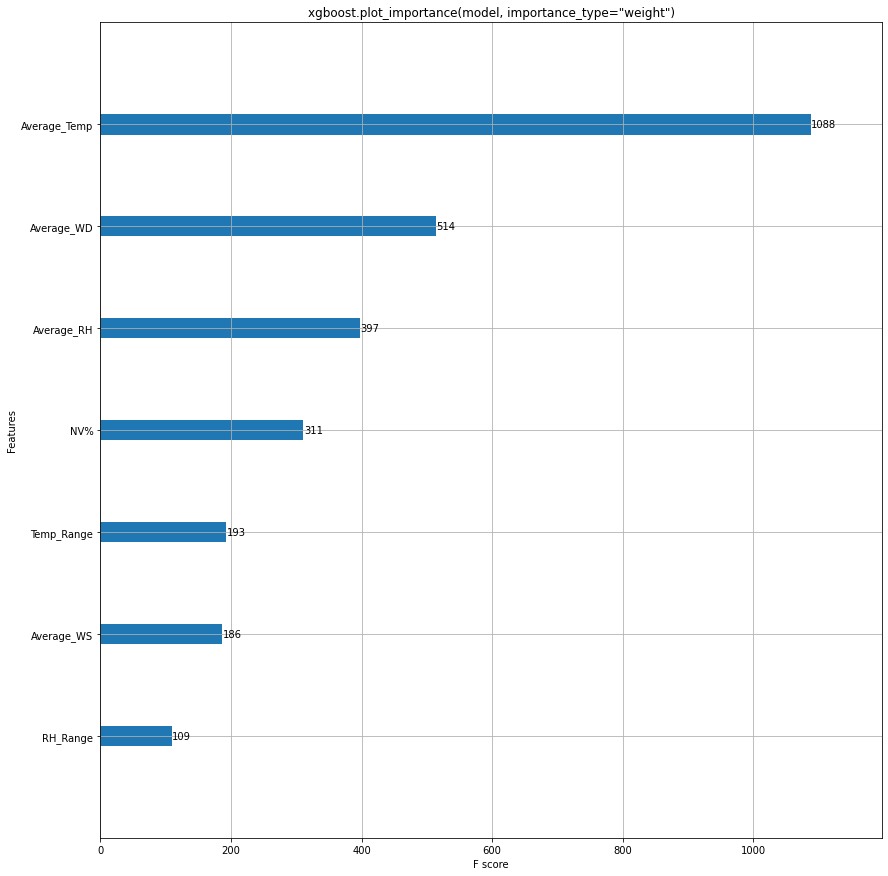

In [89]:
import xgboost as xgb
xgb.plot_importance(enhanced_model, importance_type='weight')
plt.title('xgboost.plot_importance(model, importance_type="weight")')
plt.show()

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


X = X_train
y = y_train

clf = DecisionTreeClassifier(max_depth=10, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, X, y)
print (scores.mean())                            


clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print (scores.mean())                             


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print (scores.mean())

0.5086170408538828
0.5019000736105999
0.5086170408538828
